In [1]:
import numpy as np
import pandas as pd
import re
import nltk

In [2]:
train_location = "/content/train_data.txt"
train_data = pd.read_csv(train_location, sep=':::', names=['Id', 'Title', 'Genre', 'Description'], engine='python')

In [3]:
train_data.head()

,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
train_data.isna().sum()

Id             0
Title          0
Genre          0
Description    0
dtype: int64

In [5]:
train_data['Genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [6]:
encode_Genre = {' drama ':0, ' thriller ':1, ' adult ':2, ' documentary ':3, ' comedy ':4,' crime ':5, ' reality-tv ':6, ' horror ':7, ' sport ':8, ' animation ':9,' action ':10, ' fantasy ':11, ' short ':12, ' sci-fi ':13, ' music ':14,' adventure ':15, ' talk-show ':16, ' western ':17, ' family ':18, ' mystery ':19,' history ':20, ' news ':21, ' biography ':22, ' romance ':23, ' game-show ':24,' musical ':25, ' war ':26}

In [7]:
train_data['Genre'] = train_data['Genre'].map(encode_Genre)

In [8]:
train_data.head()

,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),0,Listening in to a conversation between his do...
1,2,Cupid (1997),1,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",2,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),0,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),0,The film's title refers not only to the un-re...


In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [11]:
courpus = []

In [12]:
train_data['Description'][0]

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [13]:
re.sub(pattern='[^a-zA-Z]',repl=' ', string = train_data['Description'][0])

' Listening in to a conversation between his doctor and parents     year old Oscar learns what nobody has the courage to tell him  He only has a few weeks to live  Furious  he refuses to speak to anyone except straight talking Rose  the lady in pink he meets on the hospital stairs  As Christmas approaches  Rose uses her fantastical experiences as a professional wrestler  her imagination  wit and charm to allow Oscar to live life and love to the full  in the company of his friends Pop Corn  Einstein  Bacon and childhood sweetheart Peggy Blue '

In [14]:
re.sub(pattern='[^a-zA-Z]',repl=' ', string = train_data['Description'][0]).lower()

' listening in to a conversation between his doctor and parents     year old oscar learns what nobody has the courage to tell him  he only has a few weeks to live  furious  he refuses to speak to anyone except straight talking rose  the lady in pink he meets on the hospital stairs  as christmas approaches  rose uses her fantastical experiences as a professional wrestler  her imagination  wit and charm to allow oscar to live life and love to the full  in the company of his friends pop corn  einstein  bacon and childhood sweetheart peggy blue '

In [15]:
for i in range(0, train_data.shape[0]):
    Description = re.sub(pattern = '[^a-zA-Z]' ,repl = ' ', string = train_data['Description'][i])
    Description = Description.lower()
    words = Description.split()
    cleaned_words = [word for word in words if word not in set(stopwords.words('english'))]
    ps = PorterStemmer()
    words = [ps.stem(word) for word in cleaned_words]
    Description = ' '.join(words)
    courpus.append(Description)

In [16]:
courpus[0]

'listen convers doctor parent year old oscar learn nobodi courag tell week live furiou refus speak anyon except straight talk rose ladi pink meet hospit stair christma approach rose use fantast experi profession wrestler imagin wit charm allow oscar live life love full compani friend pop corn einstein bacon childhood sweetheart peggi blue'

In [17]:
#creating the bag of words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000, ngram_range = (1, 2) )
X = cv.fit_transform(courpus).toarray()
y = train_data['Genre'].values

In [18]:
#splitting the model in to trainimg set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

In [22]:
y_pred = classifier.predict(x_test)
y_pred

array([ 3,  4,  3, ..., 12,  3,  3])

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1653,   92,   10,  228,  265,   33,   10,   39,    6,    3,   54,
           9,  166,   13,    5,   19,    6,   35,   15,    6,    7,    3,
           8,   70,    0,    7,   11],
       [  79,   88,    2,   10,   28,   12,    1,   48,    0,    0,   22,
           2,   18,    3,    0,    0,    0,    3,    0,    5,    0,    0,
           0,    3,    0,    0,    0],
       [   5,    1,   59,    2,   20,    2,    1,    2,    0,    0,    2,
           0,    9,    1,    0,    5,    0,    1,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [ 173,    5,    3, 1856,   39,    9,   65,    9,   47,    3,   13,
           1,  135,   15,  101,   13,   13,    0,   11,    4,   24,    7,
          21,    4,    1,    6,    8],
       [ 270,   18,   11,   63,  830,   14,   22,   23,    4,   10,   21,
           8,   49,    4,   27,   19,   31,    6,   18,    5,    2,    2,
           2,   33,    3,    0,    2],
       [  15,   21,    0,    5,   10,   18,    0,    6,    0,    

<Axes: >

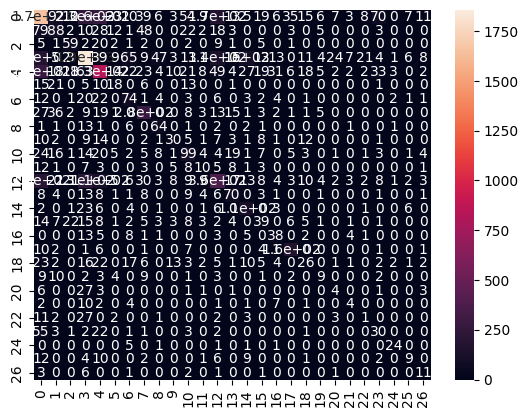

In [24]:
import seaborn as sns
sns.heatmap(cm, annot = True)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5497556026929816

In [26]:
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.60      0.61      2773
           1       0.27      0.27      0.27       324
           2       0.51      0.54      0.52       110
           3       0.71      0.72      0.72      2586
           4       0.56      0.55      0.56      1497
           5       0.17      0.20      0.18        90
           6       0.32      0.47      0.38       157
           7       0.58      0.66      0.62       424
           8       0.44      0.68      0.54        94
           9       0.39      0.28      0.33       107
          10       0.34      0.40      0.37       248
          11       0.17      0.15      0.16        67
          12       0.45      0.35      0.39      1050
          13       0.40      0.50      0.45       139
          14       0.37      0.67      0.48       163
          15       0.28      0.26      0.27       150
          16       0.33      0.47      0.39        81
  

In [27]:
import pickle

In [28]:
pickle.dump(cv, open('cv.pkl', 'wb'))

In [30]:
pickle.dump(classifier, open('model.pkl', 'wb'))